In [1]:
##############################################################
##         Part II: Logistic Regression
##############################################################

In [2]:
# 2.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"G:\University of Buffalo\CSE 574\Assignments\Assignment 1\noisy_datasets\penguins.csv")

In [4]:
# Pre processing

In [5]:
df.dropna(subset=['gender', 'species', 'island'], inplace=True)

df['species'] = df['species'].replace('GENTOO','Gentoo')
df['species'] = df['species'].replace('gentoo','Gentoo')
df['species'] = df['species'].replace('chinstrap','Chinstrap')
df['species'] = df['species'].replace('CHINSTRAP','Chinstrap')
df['species'] = df['species'].replace('adelie','Adelie')

df['island'] = df['island'].replace('biscoe','Biscoe')
df['island'] = df['island'].replace('BISCOE','Biscoe')
df['island'] = df['island'].replace('dream','Dream')
df['island'] = df['island'].replace('DREAM','Dream')
df['island'] = df['island'].replace('torgersen','Torgersen')

df['gender'] = df['gender'].replace('MALE','male')

In [6]:
mean = df.loc[df['flipper_length_mm']>100, 'flipper_length_mm'].mean()
df["flipper_length_mm"] = df["flipper_length_mm"].mask(df["flipper_length_mm"] < 100, mean)

In [7]:
counts = df['island'].value_counts()
counts

Biscoe       155
Dream        114
Torgersen     42
Name: island, dtype: int64

In [8]:
def normalize(column_name):
    minimum = df[column_name].min()
    maximum = df[column_name].max()

    normalized_column = (df[column_name] - minimum) / (maximum - minimum)

    return normalized_column
    
df['bill_length_mm'] = normalize('bill_length_mm')
df['flipper_length_mm'] = normalize('flipper_length_mm')
df['body_mass_g'] = normalize('body_mass_g')
df['bill_depth_mm'] = normalize('bill_depth_mm')

df


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,0.086795,0.049054,0.152542,0.291667,male,2007.0
1,Adelie,Torgersen,4890,14,0.091754,0.037666,0.237288,0.305556,female,2007.0
2,Adelie,Torgersen,7184,11,0.101674,0.042922,0.389831,0.152778,female,2007.0
4,Adelie,Torgersen,4774,8,0.057037,0.054310,0.355932,0.208333,female,2007.0
5,Adelie,Torgersen,4403,13,0.089275,0.065697,0.305085,0.263889,male,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,0.293862,0.058690,0.593220,0.361111,male,2009.0
340,Chinstrap,Dream,4111,9,0.141352,0.043798,0.508475,0.194444,female,2009.0
341,Chinstrap,Dream,7049,10,0.216987,0.044674,0.355932,0.298611,male,2009.0
342,Chinstrap,Dream,4705,7,0.231866,0.051682,0.644068,0.388889,male,2009.0


In [9]:
# 2.2

In [10]:
#Chose Target
y = df['gender']

In [11]:
# One Hot is decreasing accuracy. So categorized without it

In [12]:
df = df.fillna(df.mean())

In [13]:
# df = pd.get_dummies(df, columns = ['species', 'island']) 
df['gender'] = pd.factorize(df['gender'])[0]
df['species'] = pd.factorize(df['species'])[0]
df['island'] = pd.factorize(df['island'])[0]

In [14]:
df.corr()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
species,1.000000,0.445399,-0.060205,-0.041003,0.676200,-0.031370,0.356773,0.203095,-0.015576,-0.028427
island,0.445399,1.000000,-0.066635,-0.050705,0.214632,0.041397,-0.151843,-0.204956,-0.015880,-0.032439
calorie requirement,-0.060205,-0.066635,1.000000,-0.042879,0.012275,-0.054146,-0.005807,0.016756,0.015871,-0.017163
average sleep duration,-0.041003,-0.050705,-0.042879,1.000000,0.052505,0.039301,0.067224,0.086933,-0.083965,0.016947
bill_length_mm,0.676200,0.214632,0.012275,0.052505,1.000000,-0.016300,0.494340,0.416001,-0.232340,0.088153
bill_depth_mm,-0.031370,0.041397,-0.054146,0.039301,-0.016300,1.000000,-0.110771,-0.072864,-0.163631,-0.085408
flipper_length_mm,0.356773,-0.151843,-0.005807,0.067224,0.494340,-0.110771,1.000000,0.867695,-0.271418,0.162821
body_mass_g,0.203095,-0.204956,0.016756,0.086933,0.416001,-0.072864,0.867695,1.000000,-0.436622,0.037684
gender,-0.015576,-0.015880,0.015871,-0.083965,-0.232340,-0.163631,-0.271418,-0.436622,1.000000,-0.003394
year,-0.028427,-0.032439,-0.017163,0.016947,0.088153,-0.085408,0.162821,0.037684,-0.003394,1.000000


In [15]:
df = df.drop(['calorie requirement', 'average sleep duration', 'year'], axis=1)

In [16]:
X = df[['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm', 'body_mass_g']].values
Y = df[['gender']].values
X.shape
type(Y.shape)

tuple

In [17]:
split_ratio = 0.8

N, d = X.shape

# Calculated the number of samples for training and testing
num_training_samples = int(N * split_ratio)
num_testing_samples = N - num_training_samples


X_train = X[:num_training_samples, :]
Y_train = Y[:num_training_samples, :]
X_test = X[num_training_samples:, :]
Y_test = Y[num_training_samples:, :]

# Check the shapes of the resulting sets
print("Training (X_train, Y_train):", X_train.shape, Y_train.shape)
print("Test (X_test, Y_test):", X_test.shape, Y_test.shape)

Training (X_train, Y_train): (248, 4) (248, 1)
Test (X_test, Y_test): (63, 4) (63, 1)


In [18]:
X_test.shape

(63, 4)

In [19]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate, iteration):
        self.learning_rate = learning_rate
        self.iteration = iteration
        
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss_ASS(self, y, h, i):
        
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        loss_a = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
#       print(f'Iteration number: {i}, Loss: {loss_a}')
        return loss_a
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        weights_list = []
        loss_list = []
        self.bias = 0
        
        # Gradient Descent below
        
        for i in range(self.iteration):
            linear_mod = np.dot(X, self.weights) + self.bias
            predicted_probabilities = self.sigmoid(linear_mod)
#           print(predicted_probabilities)

            # Doing Gradient Calculation
            dw = (1 / num_samples) * np.dot(X.T, (predicted_probabilities - y))
            db = (1 / num_samples) * np.sum(predicted_probabilities - y)

#           print(dw)
            # Updating weights and bias
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            
#           print(f"self weights: {self.weights}")
            
            if(i % (self.iteration / 10) == 0):
                # Recording weights at regular intervals
                weights_list.append(self.weights)
            
            
            u = self.loss_ASS(y, predicted_probabilities, i+1)
            
            if(i % (self.iteration / 100) == 0):
                # Recording loss at regular intervals
                loss_list.append(u)
            
#           print(u)
            
        return weights_list, loss_list

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predicted_probabilities = self.sigmoid(linear_model)
        predicted_labels = [1 if k >= 0.5 else 0 for k in predicted_probabilities]
        return predicted_labels

In [20]:
model = LogisticRegression(0.001, 10000)

In [21]:
reshaped_X_train = X_train.reshape(-1)
reshaped_X_train.shape
reshaped_Y_train = Y_train.reshape(-1)
reshaped_Y_train.shape

len(reshaped_X_train)

992

In [22]:
#X_train

In [23]:
weight_list, loss_list = model.fit(X_train, reshaped_Y_train)
# print(loss_list)


In [24]:
y_pred = model.predict(X_test)

In [25]:
type(y_pred)
y_test = Y_test.tolist()
type(y_test)

success = 0

for i in range (len(y_test)):
    if y_test[i][0] == y_pred[i]:
        success += 1

accuracy = success / len(y_test)

print(f'Acccuracy for Logistic regression: {round(accuracy * 100, 2)}%')


Acccuracy for Logistic regression: 74.6%


In [26]:
#print(loss_list) #Len = 100

In [27]:
# 2.7 - Training the model with 3 different hyperparameters
# 2.10 - Plotting the loss graph and printing out the loss values over each iteration

Text(0.5, 1.0, 'Iteration vs Loss (LR = 0.1, Iter = 100000)')

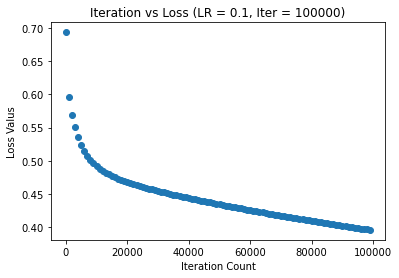

In [28]:
model_01 = LogisticRegression(0.1, 100000)
weight_list_01, loss_list_01 = model_01.fit(X_train, reshaped_Y_train)

iteration_count = []
for i in range(len(loss_list_01)):
    i = i*1000
    iteration_count.append(i)
    
plt.scatter(iteration_count, loss_list_01)
plt.xlabel("Iteration Count")
plt.ylabel("Loss Valus")
plt.title("Iteration vs Loss (LR = 0.1, Iter = 100000)")

In [29]:
y_pred_01 = model_01.predict(X_test)

type(y_pred_01)
y_test = Y_test.tolist()
type(y_test)

success = 0

for i in range (len(y_test)):
    if y_test[i][0] == y_pred_01[i]:
        success += 1

accuracy = success / len(y_test)

print(f'Acccuracy for Logistic regression: {round(accuracy * 100, 2)}%')


Acccuracy for Logistic regression: 65.08%


Text(0.5, 1.0, 'Iteration vs Loss (LR = 0.01, Iter = 100000)')

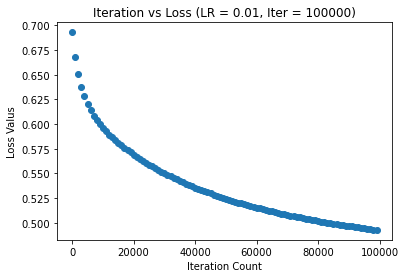

In [30]:
model_02 = LogisticRegression(0.01, 100000)
weight_list_02, loss_list_02 = model_02.fit(X_train, reshaped_Y_train)

iteration_count = []
for i in range(len(loss_list_02)):
    i = i*1000
    iteration_count.append(i)
    
plt.scatter(iteration_count, loss_list_02)
plt.xlabel("Iteration Count")
plt.ylabel("Loss Valus")
plt.title("Iteration vs Loss (LR = 0.01, Iter = 100000)")

In [31]:
y_pred_02 = model_02.predict(X_test)

type(y_pred_02)
y_test = Y_test.tolist()
type(y_test)

success = 0

for i in range (len(y_test)):
    if y_test[i][0] == y_pred_02[i]:
        success += 1

accuracy = success / len(y_test)

print(f'Acccuracy for Logistic regression: {round(accuracy * 100, 2)}%')

Acccuracy for Logistic regression: 57.14%


Text(0.5, 1.0, 'Iteration vs Loss (LR = 0.001, Iter = 10000)')

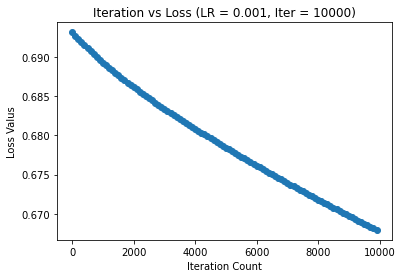

In [32]:
model_03 = LogisticRegression(0.001, 10000)
weight_list_03, loss_list_03 = model_03.fit(X_train, reshaped_Y_train)

iteration_count = []
for i in range(len(loss_list_03)):
    i = i*100
    iteration_count.append(i)
    
plt.scatter(iteration_count, loss_list_03)
plt.xlabel("Iteration Count")
plt.ylabel("Loss Valus")
plt.title("Iteration vs Loss (LR = 0.001, Iter = 10000)")

In [33]:
# 2.9 - Making prediction and printing the accuracy

In [34]:
y_pred_03 = model_03.predict(X_test)

type(y_pred_03)
y_test = Y_test.tolist()
type(y_test)

success = 0

for i in range (len(y_test)):
    if y_test[i][0] == y_pred_03[i]:
        success += 1

accuracy = success / len(y_test)

print(f'Acccuracy for Logistic regression: {round(accuracy * 100, 2)}%')

Acccuracy for Logistic regression: 74.6%


In [35]:
# 2.8 - Saving weights into a pickle file.

In [36]:
import pickle 

weights_for_2 = {
    'Weight for Logistic Reg': weight_list
}

pickle.dump(weights_for_2, open( "nsaquib2_assignment1_part2.pickle", "wb" ) )

In [37]:
out = pickle.load( open( "nsaquib2_assignment1_part2.pickle", "rb" ) )
out

{'Weight for Logistic Reg': [array([-1.22592644e-05, -3.37589295e-05, -5.05727671e-06, -5.56476905e-05]),
  array([-0.01141594, -0.03044444, -0.0048778 , -0.0527085 ]),
  array([-0.0214599 , -0.05552604, -0.00946937, -0.10058258]),
  array([-0.03054187, -0.07682614, -0.01387891, -0.14504839]),
  array([-0.0389337 , -0.09540299, -0.01817383, -0.18704323]),
  array([-0.04682133, -0.11198074, -0.02239985, -0.22720865]),
  array([-0.05433218, -0.12705592, -0.02658794, -0.26598464]),
  array([-0.06155377, -0.14096997, -0.030759  , -0.30367392]),
  array([-0.06854647, -0.15395867, -0.0349271 , -0.34048565]),
  array([-0.07535208, -0.16618568, -0.03910163, -0.37656515])]}

In [ ]:
# Saving clean data in a csv

In [40]:
from pathlib import Path  
filepath = Path('G:\\University of Buffalo\\CSE 574\\Assignments\\Assignment 1\\Assignment1 Report\\penguin_preprocessed.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [38]:
'''
# References

1.https://www.google.com/search?q=correlation+coefficient+python&sca_esv=569265910&biw=1396&bih=724&tbm=vid&sxsrf=AM9HkKli_FJwN-dTv7-VWtE5PiVEF9Edug%3A1695948704733&ei=oB8WZeqkLLmj5NoP6syViAY&ved=0ahUKEwjq9Oigzc6BAxW5EVkFHWpmBWEQ4dUDCA0&uact=5&oq=correlation+coefficient+python&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIh5jb3JyZWxhdGlvbiBjb2VmZmljaWVudCBweXRob24yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBRAAGIAESMgBUABYAHAAeACQAQCYAX2gAX2qAQMwLjG4AQPIAQD4AQL4AQGIBgE&sclient=gws-wiz-video#fpstate=ive&vld=cid:3254ab18,vid:4YDDTgnxkeA,st:0

2. https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

3. https://www.kaggle.com/code/jagannathrk/logistic-regression-from-scratch-python

'''

'\n# References\n\n1.https://www.google.com/search?q=correlation+coefficient+python&sca_esv=569265910&biw=1396&bih=724&tbm=vid&sxsrf=AM9HkKli_FJwN-dTv7-VWtE5PiVEF9Edug%3A1695948704733&ei=oB8WZeqkLLmj5NoP6syViAY&ved=0ahUKEwjq9Oigzc6BAxW5EVkFHWpmBWEQ4dUDCA0&uact=5&oq=correlation+coefficient+python&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIh5jb3JyZWxhdGlvbiBjb2VmZmljaWVudCBweXRob24yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBRAAGIAESMgBUABYAHAAeACQAQCYAX2gAX2qAQMwLjG4AQPIAQD4AQL4AQGIBgE&sclient=gws-wiz-video#fpstate=ive&vld=cid:3254ab18,vid:4YDDTgnxkeA,st:0\n\n'